In [28]:
import pandas as pd

'''
create a example dataset
''' 
# four features and a class that is two categories
outlook = ['Sunny','Sunny','Overcast','Overcast','Rain','Rain']
temp = ['Hi','Hi','Hi','Lo','Lo','Lo']
humid = ['Hi','Hi','Lo','Lo','Hi','Hi']
wind = ['No','Yes','No','Yes','No','Yes']
decision = ['NP','NP','P','P','P','NP']

# show table about dataset
table = {'Outlook':outlook,'Temperature':temp,'Humidity':humid,'Windy':wind,'Decision':decision}
df = pd.DataFrame(data=table)
df

,Outlook,Temperature,Humidity,Windy,Decision
0,Sunny,Hi,Hi,No,NP
1,Sunny,Hi,Hi,Yes,NP
2,Overcast,Hi,Lo,No,P
3,Overcast,Lo,Lo,Yes,P
4,Rain,Lo,Hi,No,P
5,Rain,Lo,Hi,Yes,NP


In [29]:
'''
preprocess the datasets
'''
from sklearn import preprocessing

# create labelEncoder
le = preprocessing.LabelEncoder()
# converting string labels into numbers
outlook_encoded= le.fit_transform(outlook)
temp_encoded= le.fit_transform(temp)
humid_encoded= le.fit_transform(humid)
wind_encoded= le.fit_transform(wind)
label_encoded= le.fit_transform(decision)
print('outlook:',outlook_encoded) # sunny:2 overcast:0 rain:1
print('temp:',temp_encoded) # high:0 low:1
print('humid:',humid_encoded) # high:0 low:1
print('wind:',wind_encoded) # no:0 yes:1
print('decision:',label_encoded) # no play:0 play:1

outlook: [2 2 0 0 1 1]
temp: [0 0 0 1 1 1]
humid: [0 0 1 1 0 0]
wind: [0 1 0 1 0 1]
decision: [0 0 1 1 1 0]


In [30]:
import numpy as np
# combine features into a single list of tuples
features = np.stack((outlook_encoded,temp_encoded,humid_encoded,wind_encoded),axis=1)
print('features:',features)

features: [[2 0 0 0]
 [2 0 0 1]
 [0 0 1 0]
 [0 1 1 1]
 [1 1 0 0]
 [1 1 0 1]]


In [31]:
'''
training model--ID3
'''
from sklearn.tree import DecisionTreeClassifier

# create decistionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')
# train decision tree model
clf = clf.fit(features, label_encoded)
# predict test
predicted = clf.predict([[2,0,1,0]])
print('predicted result:',predicted) # no play:0 play:1

predicted result: [1]


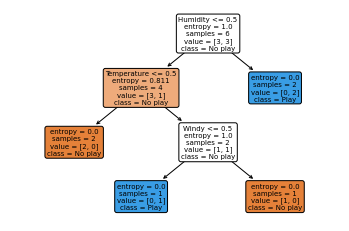

<Figure size 3000x3000 with 0 Axes>

In [32]:
'''
draw decision tree
'''
from sklearn import tree
from matplotlib import pyplot as plt

# export decision tree graph
tree.plot_tree(clf, feature_names=['Outlook', 'Temperature', 'Humidity', 'Windy'], class_names=['No play','Play'], 
               filled=True, rounded=True, fontsize=7)
plt.figure(figsize=(10,10), dpi=300)
plt.show()